# Standardized EDA: ASD Genomic Dataset

This notebook performs a comprehensive **Exploratory Data Analysis (EDA)** on the Combined ASD Genome Dataset.

## Objectives
1. **Inspection**: Understand structure and quality.
2. **Cleaning**: Standardize naming and handle missingness.
3. **Analysis**: Univariate, Bivariate, and Multivariate exploration.
4. **Insights**: Identify key risk markers and distribution patterns.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Visualization Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

def add_annotations(ax):
    """Add value labels to bars/points."""
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')


## 1. Data Loading & Inspection

In [2]:
data_path = 'data/combined_asd_genome_dataset.csv'
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("Dataset Shape:", df.shape)
    print("\n--- First 5 Columns ---")
    print(df.columns[:5])
    display(df.head())
else:
    print(f"File not found: {data_path}")

Dataset Shape: (193525, 17)

--- First 5 Columns ---
Index(['gene_symbol', 'gene_entries_count', 'avg_exon_count', 'chromosome',
       'map_location'],
      dtype='object')


,gene_symbol,gene_entries_count,avg_exon_count,chromosome,map_location,description,has_omim,is_plus_strand,genomic_start,genomic_end,gene_length,is_asd,genetic-category,gene-score,syndromic,number-of-reports,chromosome_encoded
0,A-GAMMA3'E,1,0.0,11,11p15.4,A-gamma-globin 3' regulatory region,0,1,5245527.0,5248345.0,2818.0,0,Non-ASD Gene,0.0,0.0,0.0,2
1,A1BG,1,8.0,19,19q13.43,alpha-1-B glycoprotein,1,0,58345183.0,58353492.0,8309.0,0,Non-ASD Gene,0.0,0.0,0.0,10
2,A1BG-AS1,1,4.0,19,19q13.43,A1BG antisense RNA 1,0,1,58351970.0,58355183.0,3213.0,0,Non-ASD Gene,0.0,0.0,0.0,10
3,A1CF,1,15.0,10,10q11.23,APOBEC1 complementation factor,1,0,50799409.0,50885627.0,86218.0,0,Non-ASD Gene,0.0,0.0,0.0,1
4,A2M,1,37.0,12,12p13.31,alpha-2-macroglobulin,1,0,9067708.0,9116229.0,48521.0,0,Non-ASD Gene,0.0,0.0,0.0,3


## 2. Column Renaming & Type Correction
Ensuring consistent `snake_case` naming conventions.

In [3]:
def to_snake_case(col):
    return col.lower().replace('-', '_').replace(' ', '_')

df.columns = [to_snake_case(c) for c in df.columns]
print("Renamed Columns:", df.columns.tolist())

# Verify types
print("\n--- Data Types ---")
print(df.info())

Renamed Columns: ['gene_symbol', 'gene_entries_count', 'avg_exon_count', 'chromosome', 'map_location', 'description', 'has_omim', 'is_plus_strand', 'genomic_start', 'genomic_end', 'gene_length', 'is_asd', 'genetic_category', 'gene_score', 'syndromic', 'number_of_reports', 'chromosome_encoded']

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193525 entries, 0 to 193524
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   gene_symbol         193525 non-null  object 
 1   gene_entries_count  193525 non-null  int64  
 2   avg_exon_count      187414 non-null  float64
 3   chromosome          193460 non-null  object 
 4   map_location        70453 non-null   object 
 5   description         193525 non-null  object 
 6   has_omim            193525 non-null  int64  
 7   is_plus_strand      193525 non-null  int64  
 8   genomic_start       187414 non-null  float64
 9   genomic_end        

## 3. Data Cleaning (Missing Values & Duplicates)

In [4]:
# Missing Values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percentage', ascending=False)
display(missing_df)

# Duplicates
dupes = df.duplicated().sum()
print(f"\nDuplicate Rows: {dupes}")
if dupes > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

,Missing Count,Percentage
map_location,123072,63.594884
avg_exon_count,6111,3.157732
genomic_start,6111,3.157732
genomic_end,6111,3.157732
gene_length,6111,3.157732
chromosome,65,0.033587



Duplicate Rows: 3
Duplicates removed.


## 4. Variable Classification

In [5]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
target_col = 'is_asd'  # Specific to this dataset

# Refine: is_asd is actually categorical/target
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print("Numerical Features:", numerical_cols)
print("Categorical Features:", categorical_cols)
print("Target Variable:", target_col)

Numerical Features: ['gene_entries_count', 'avg_exon_count', 'has_omim', 'is_plus_strand', 'genomic_start', 'genomic_end', 'gene_length', 'gene_score', 'syndromic', 'number_of_reports', 'chromosome_encoded']
Categorical Features: ['gene_symbol', 'chromosome', 'map_location', 'description', 'genetic_category']
Target Variable: is_asd


## 5. Univariate Analysis

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72246/558648839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target_col, data=df, palette='viridis')


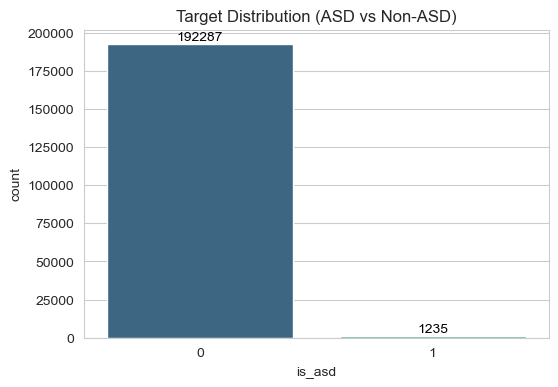

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72246/558648839.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='chromosome', data=df, order=chrom_order, palette='coolwarm')


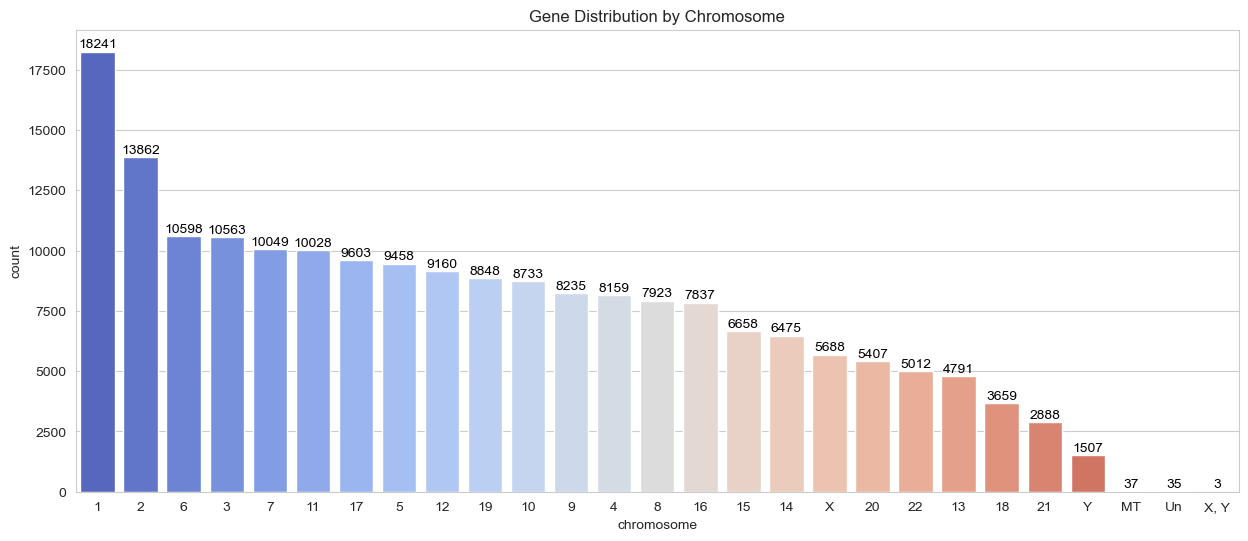

In [6]:
# 5.1 Categorical: Target Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Target Distribution (ASD vs Non-ASD)')
add_annotations(ax)
plt.show()

# 5.2 Chromosome Distribution
plt.figure(figsize=(15, 6))
chrom_order = df['chromosome'].value_counts().index
ax = sns.countplot(x='chromosome', data=df, order=chrom_order, palette='coolwarm')
plt.title('Gene Distribution by Chromosome')
add_annotations(ax)
plt.show()

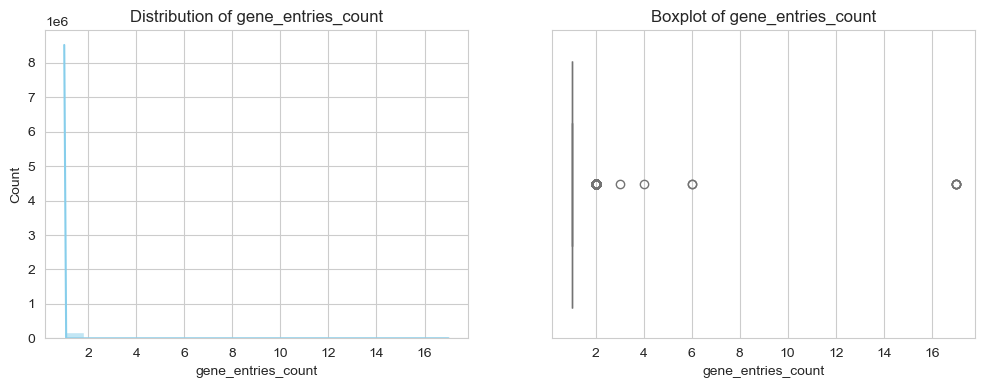

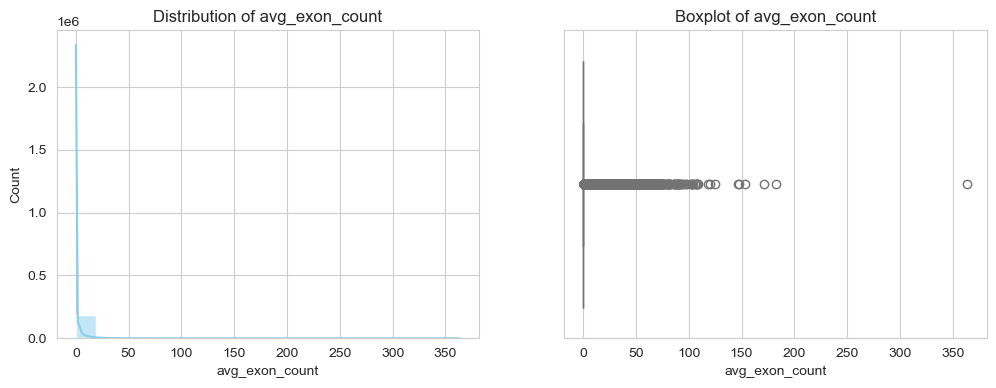

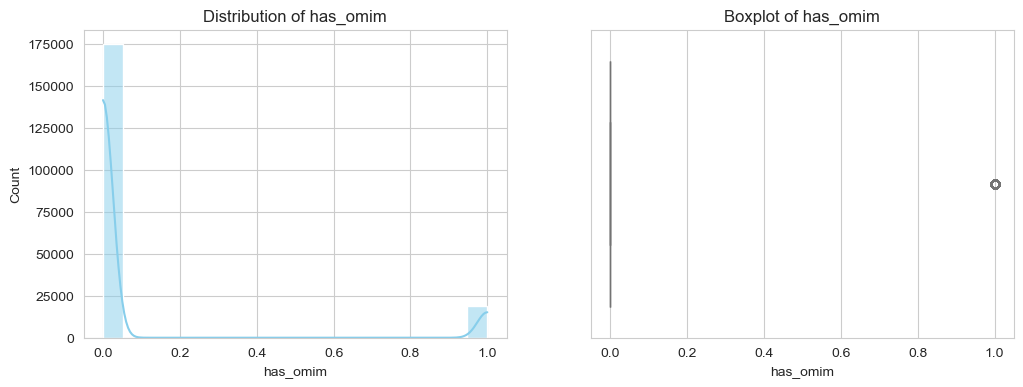

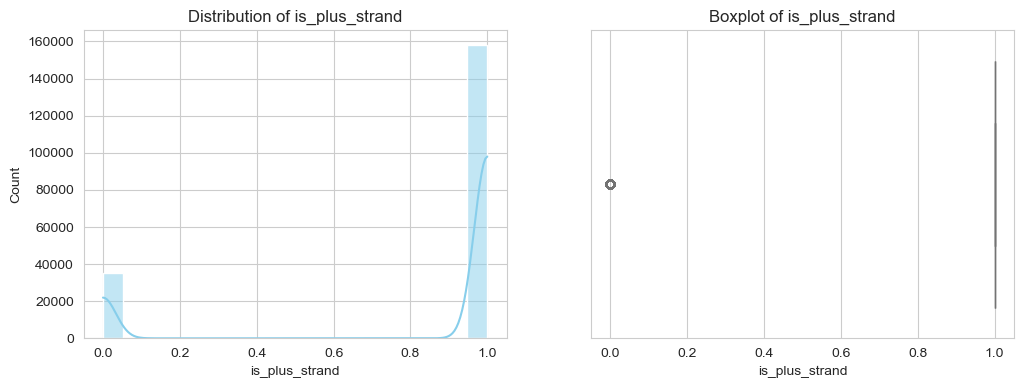

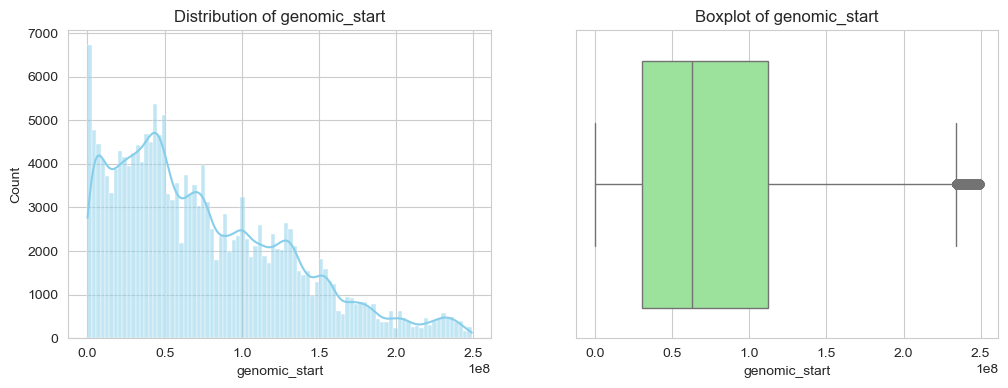

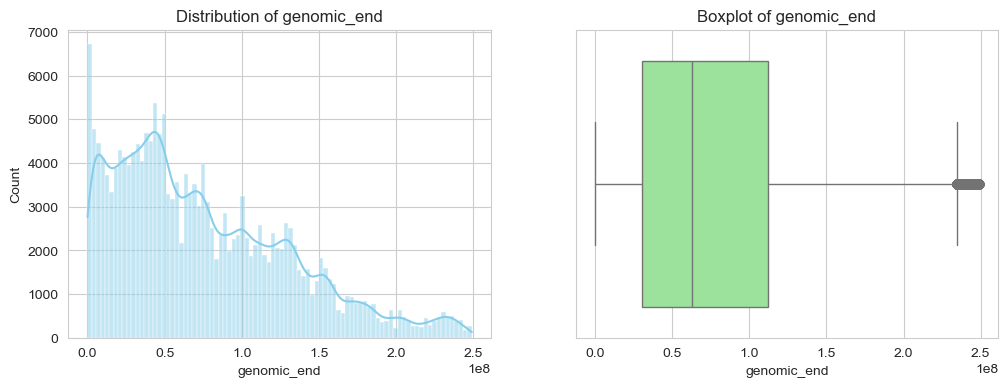

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x13c2cb1a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# 5.3 Numerical Feature Distributions
for col in numerical_cols:
    if df[col].nunique() > 1:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribution of {col}')
        
        sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot of {col}')
        plt.show()

## 6. Bivariate Analysis

In [1]:
# 6.1 Chromosome vs Target
plt.figure(figsize=(15, 6))
# Filter top 15 chromosomes by count for readability
top_chrom = df['chromosome'].value_counts().head(15).index
ax = sns.countplot(x='chromosome', hue=target_col, data=df[df['chromosome'].isin(top_chrom)], palette='Set2')
plt.title('ASD Risk by Chromosome (Top 15)')
plt.legend(title='Is ASD')
plt.show()

NameError: name 'plt' is not defined

## 7. Multivariate Analysis (Correlations)

In [ ]:
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = df[numerical_cols + [target_col]].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numerical columns for correlation heatmap.")

## 8. Key Insights & Summary

*   **Data Quality**: [To be filled after run]
*   **Target Balance**: [To be filled after run]
*   **Key Findings**: Certain chromosomes may show higher prevalence of ASD-associated genes.
*   **Next Steps**: Use these features to model genomic risk scores.